In [9]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
data_path = "../data/"
train_path = data_path + "train_homolat25.csv"
train_df = pd.read_csv(train_path)
model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

In [4]:
train_df["embeddings"] = train_df["post content"].apply(lambda x: model.encode(x))

In [7]:
embeddings_matrix = np.array(train_df["embeddings"].tolist())

# Aplicar t-SNE para reducir a 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_matrix)

In [12]:
train_df["country"].value_counts()

country
Argentina    1833
México       1604
Chile        1255
Colombia     1075
Name: count, dtype: int64

In [ ]:
train_df["tsne_x"] = embeddings_2d[:, 0]
train_df["tsne_y"] = embeddings_2d[:, 1]

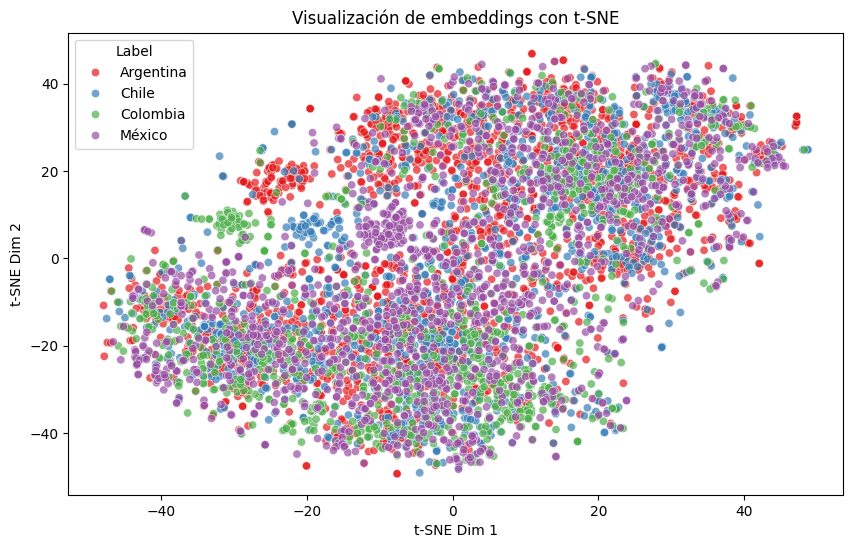

In [ ]:
# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne_x", y="tsne_y", hue="country",
    palette="Set1", data=train_df, alpha=0.7
)
plt.title("Visualización de embeddings con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Label")
plt.show()

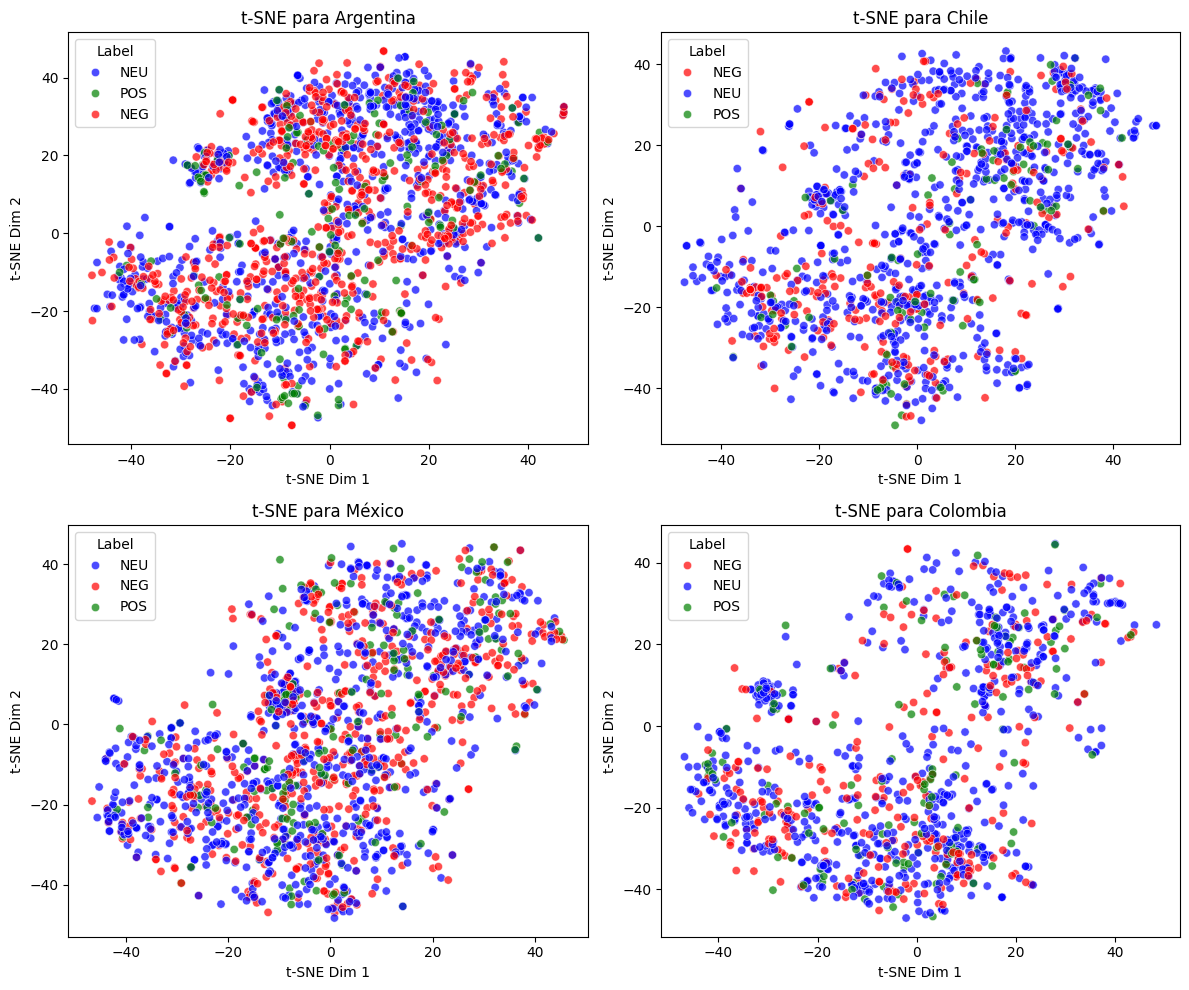

In [17]:
paises_interes = ["Argentina", "Chile", "México", "Colombia"]
df_filtrado = train_df[train_df["country"].isin(paises_interes)]

# Configurar el grid de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Paleta de colores para los labels
palette = {"NEU": "blue", "POS": "green", "NEG": "red"}

# Graficar cada país en un subplot
for i, pais in enumerate(paises_interes):
    ax = axes[i]
    df_pais = df_filtrado[df_filtrado["country"] == pais]
    
    sns.scatterplot(
        x="tsne_x", y="tsne_y", hue="label", palette=palette,
        data=df_pais, alpha=0.7, ax=ax
    )
    
    ax.set_title(f"t-SNE para {pais}")
    ax.set_xlabel("t-SNE Dim 1")
    ax.set_ylabel("t-SNE Dim 2")
    ax.legend(title="Label")

# Ajustar layout
plt.tight_layout()
plt.show()